In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [83]:
# Please paste your hyperparameter settings here
def get_keys_from_exp():
    """
    Args: None
    
    Specifty the hyperparameter settings exactly the same as in train.py
    
    Return: A list containing all hyperparameter combinations, following
            the job order when CJ creates it, so that one can find the
            corresponding results easier
    """
    net_list        = [
                       'GRU',
                       ]

    lr_list         = [
                       1e-2, 5e-3, 1e-3, 5e-4, 1e-4
                       ]

    data_list       = [1,2,3,4,5]

    hyper_keys = []
    for net in net_list:
        for lr in lr_list:
            for data in data_list:
                hyper_keys.append((net, lr, data))
                
    return hyper_keys

In [69]:
# This is a helper function to analyze one hyperparameter
def generate_loss_plots(dataframe, key):
    """
    Args: Dataframe: a pandas dataframe for one particular parameter setting
          Key: the key that indicates the current hyperparameter being analyzed
          
    Return: Creates the training / test loss plots with respect to epochs
            Best loss found among different epochs when training with this hyperparameter
    """
    best_loss = {}
    train_frame = dataframe[dataframe.phase == 'train']
    test_frame = dataframe[dataframe.phase == 'test']
    total_epochs = np.asarray(dataframe.epochs)[0]
    loss_funcs = ['avg_loss', 'avg_loss1', 'avg_loss2', 'avg_loss3']
    for frame in [train_frame, test_frame]:
        for loss_func in loss_funcs:
            phase = list(frame.phase)[0]
            best_loss['best_' + phase + '_' + loss_func] = frame[loss_func].min()     
            plt.semilogy(np.asarray(list(range(1,total_epochs+1))), frame[loss_func], label = loss_func)
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()
            plt.title('{} loss: Net={}, Lr={}, Data={}'.format(phase, key[1], key[0], key[2]))
        plt.show()
    return best_loss

There are 25 jobs submitted, they are: 
No.0, net = GRU;  lr = 0.01; data_num = 1


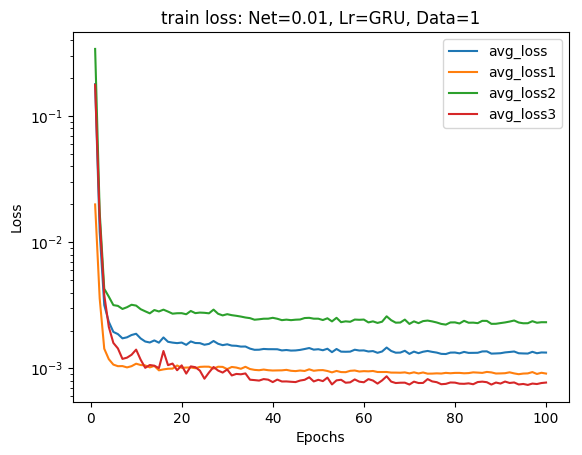

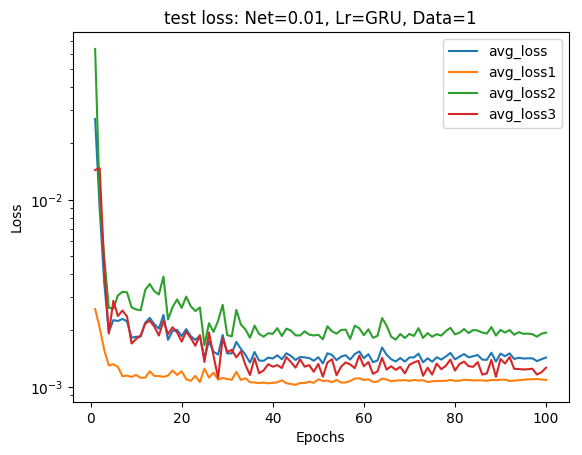

No.1, net = GRU;  lr = 0.01; data_num = 2


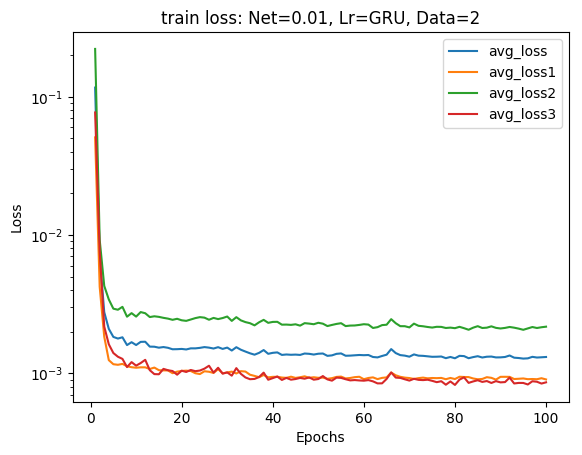

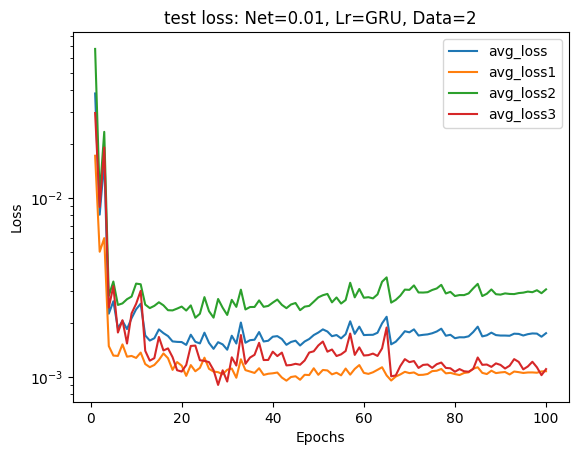

No.2, net = GRU;  lr = 0.01; data_num = 3


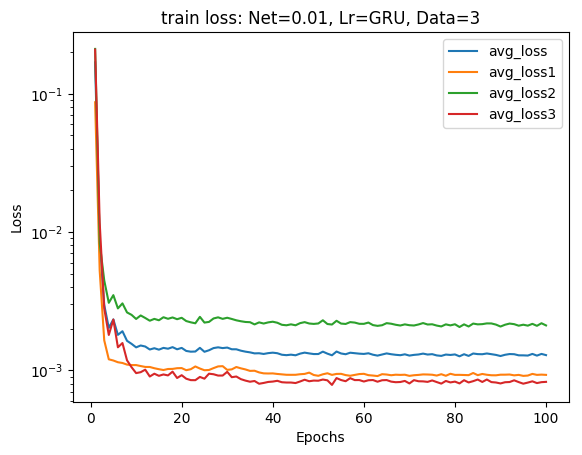

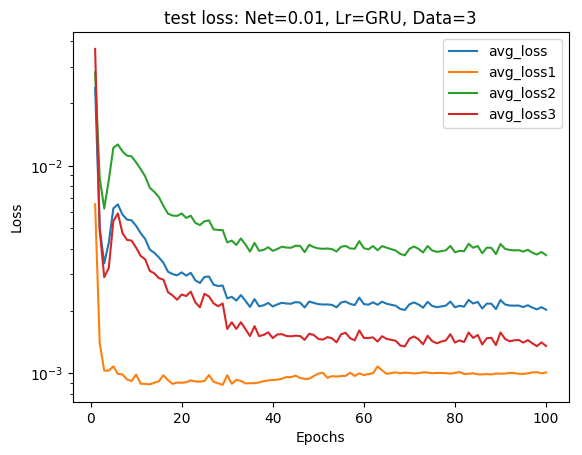

No.3, net = GRU;  lr = 0.01; data_num = 4


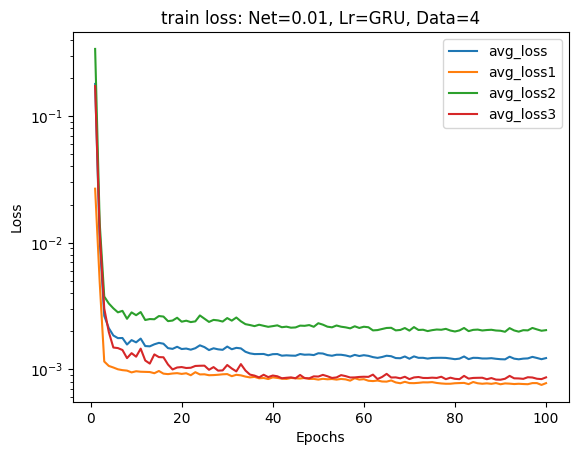

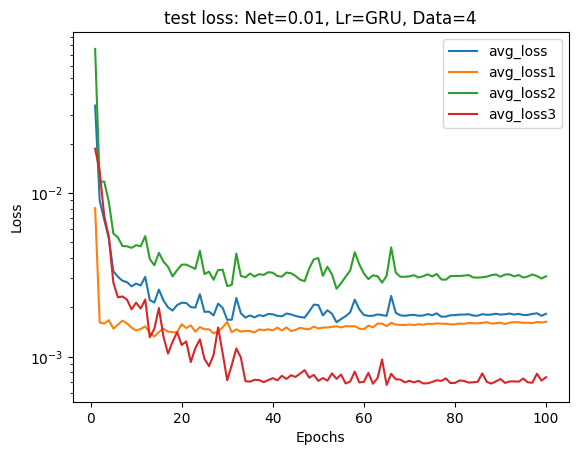

No.4, net = GRU;  lr = 0.01; data_num = 5


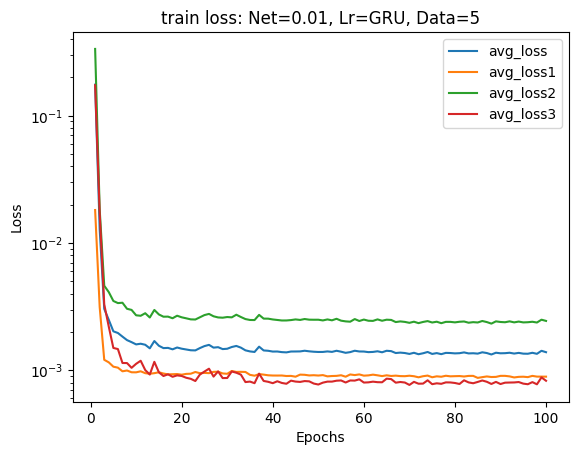

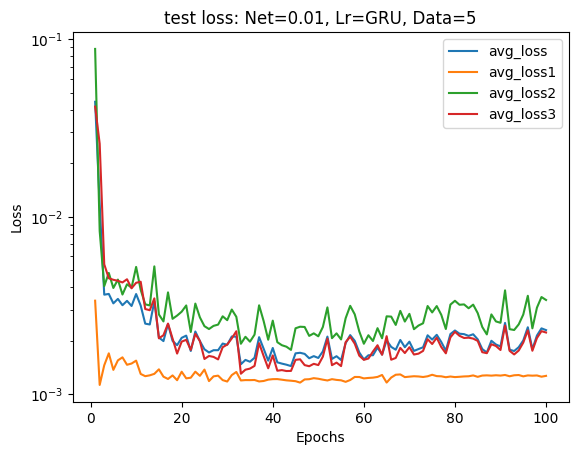

No.5, net = GRU;  lr = 0.005; data_num = 1


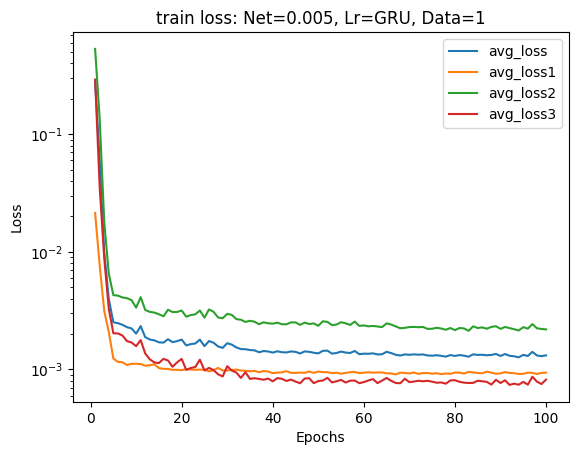

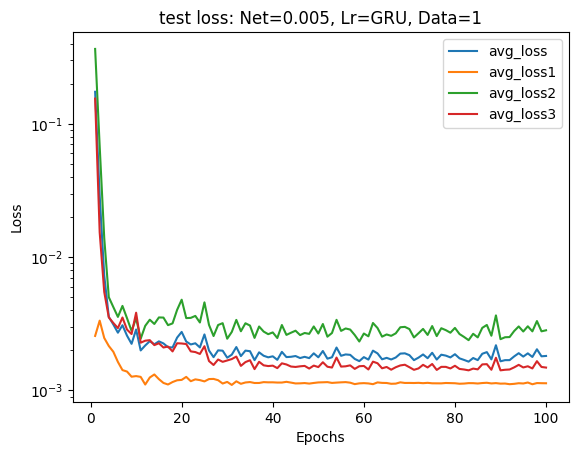

No.6, net = GRU;  lr = 0.005; data_num = 2


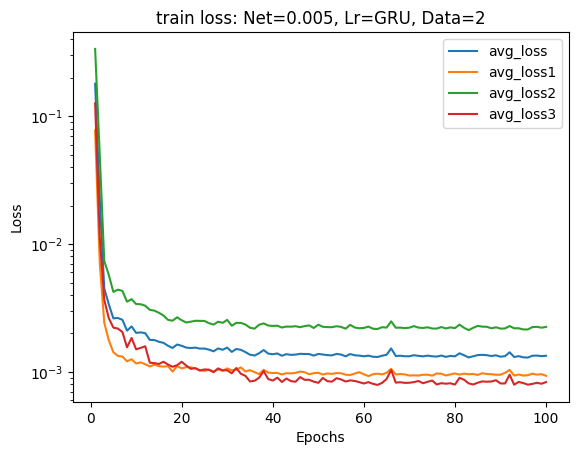

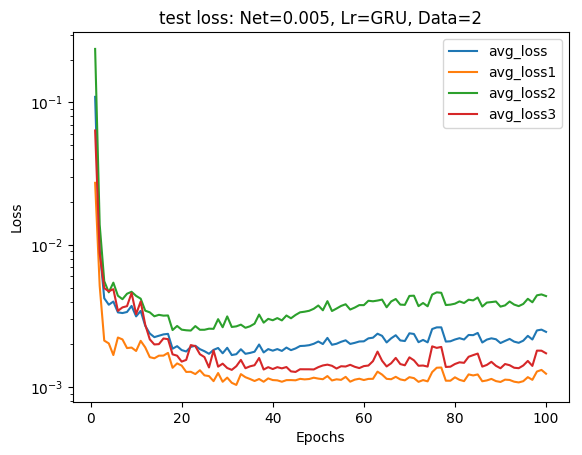

No.7, net = GRU;  lr = 0.005; data_num = 3


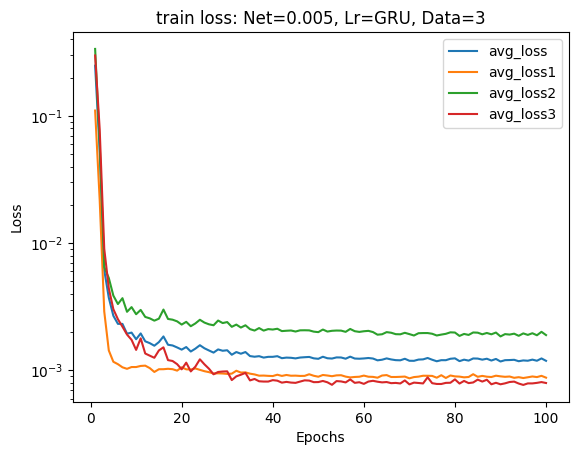

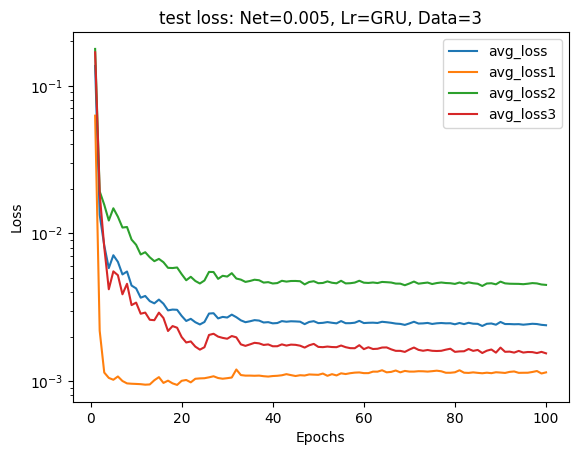

No.8, net = GRU;  lr = 0.005; data_num = 4


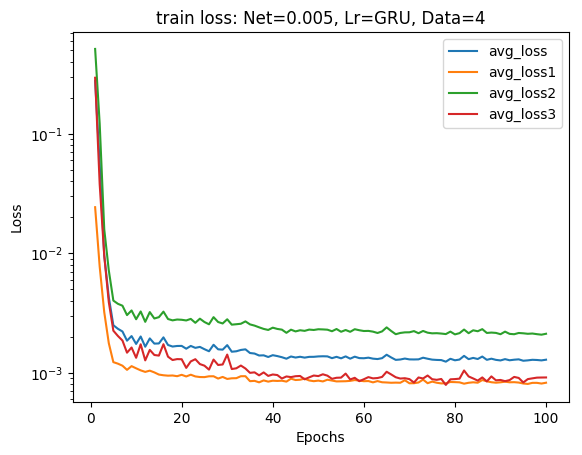

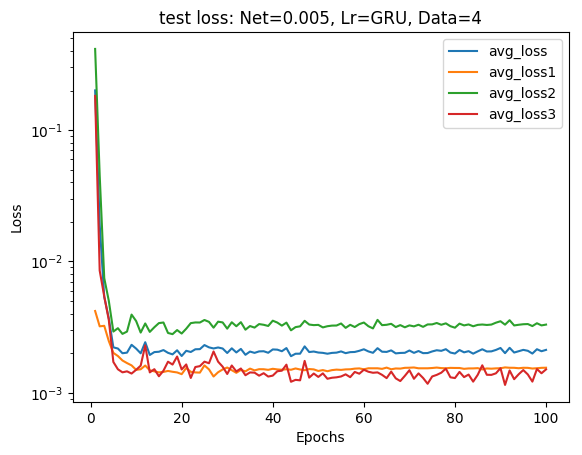

No.9, net = GRU;  lr = 0.005; data_num = 5


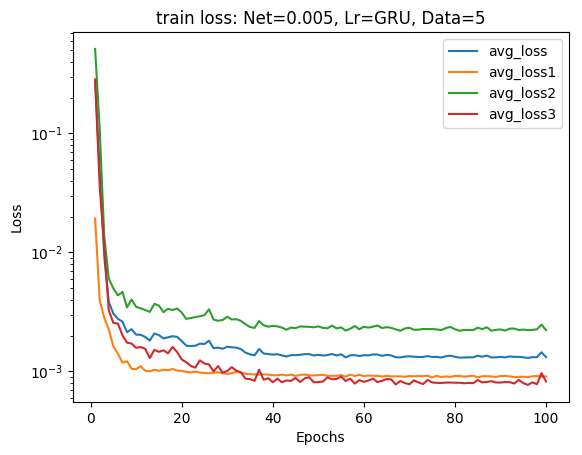

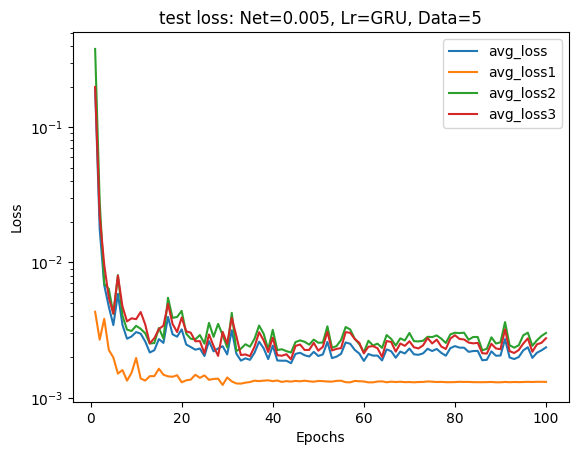

No.10, net = GRU;  lr = 0.001; data_num = 1


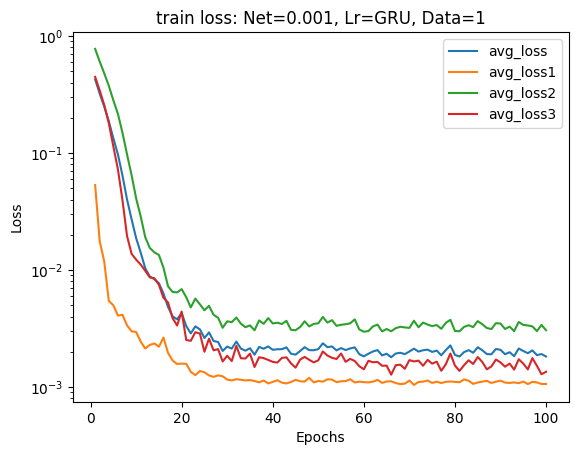

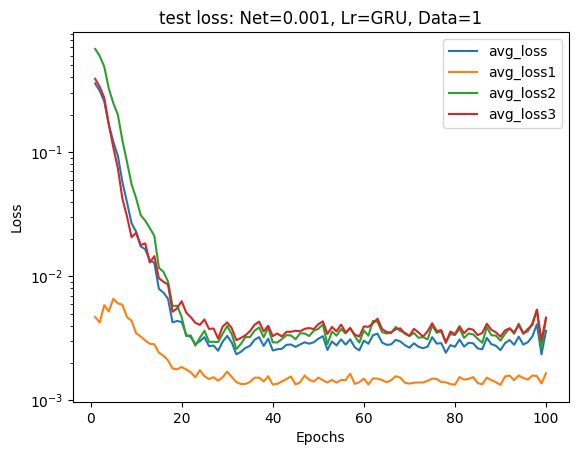

No.11, net = GRU;  lr = 0.001; data_num = 2


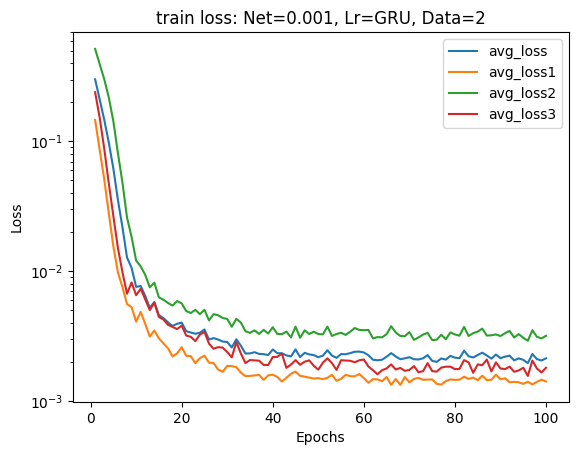

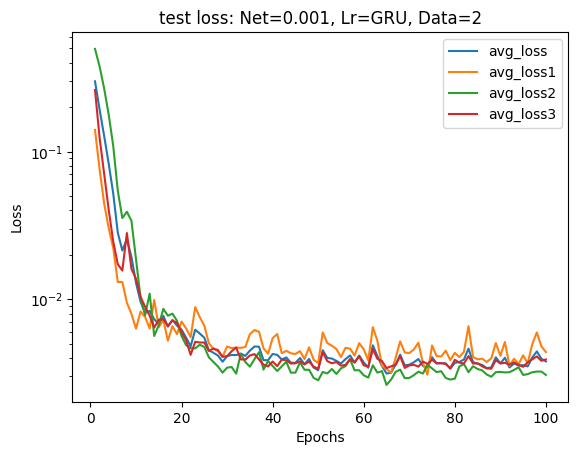

No.12, net = GRU;  lr = 0.001; data_num = 3


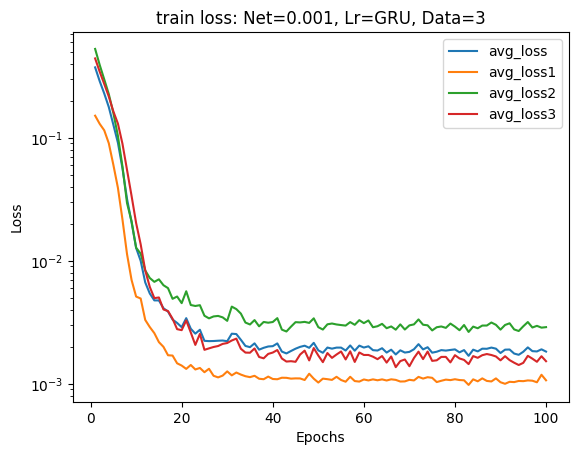

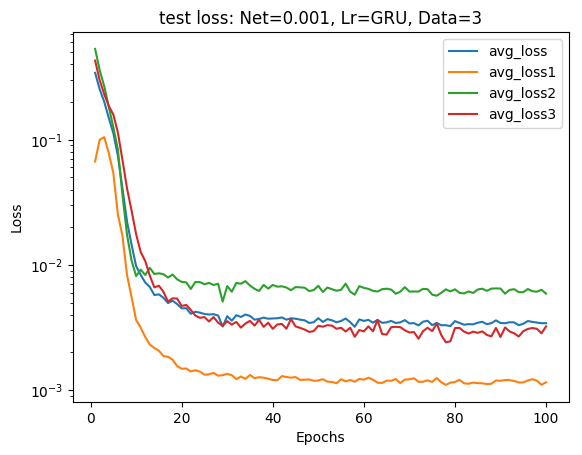

No.13, net = GRU;  lr = 0.001; data_num = 4


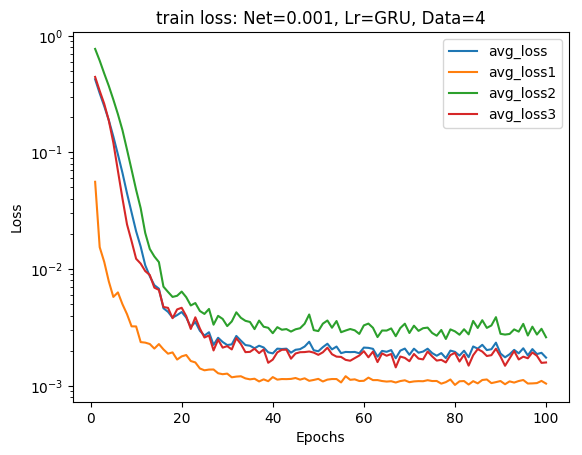

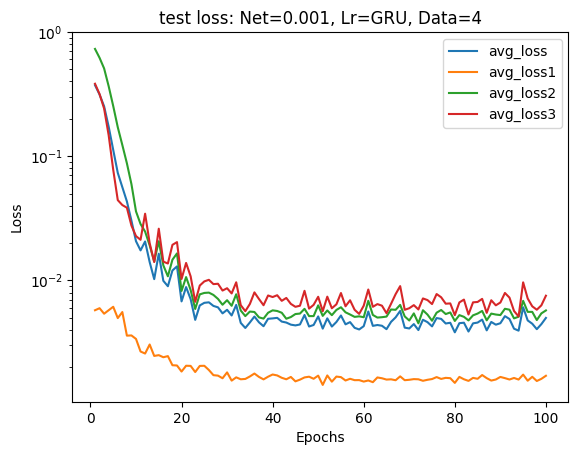

No.14, net = GRU;  lr = 0.001; data_num = 5


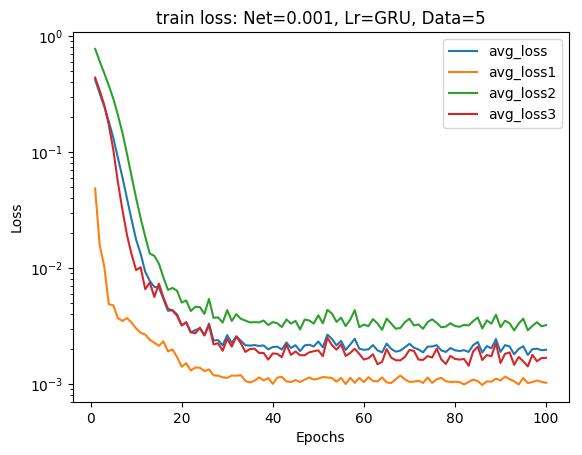

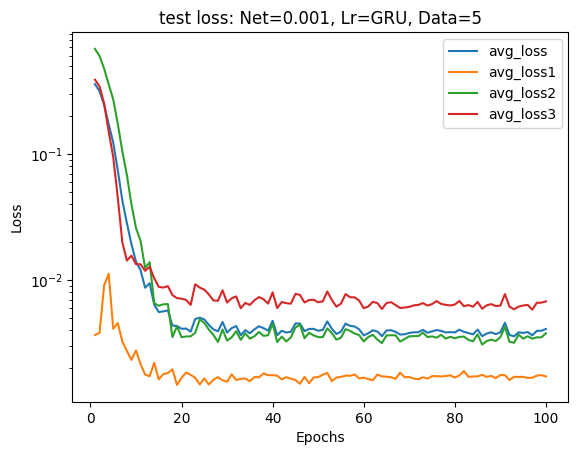

No.15, net = GRU;  lr = 0.0005; data_num = 1


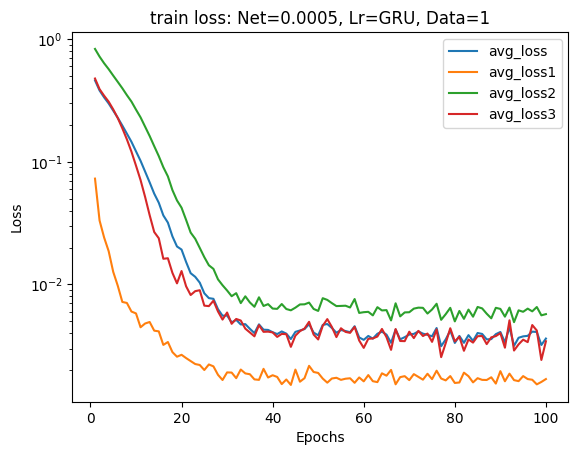

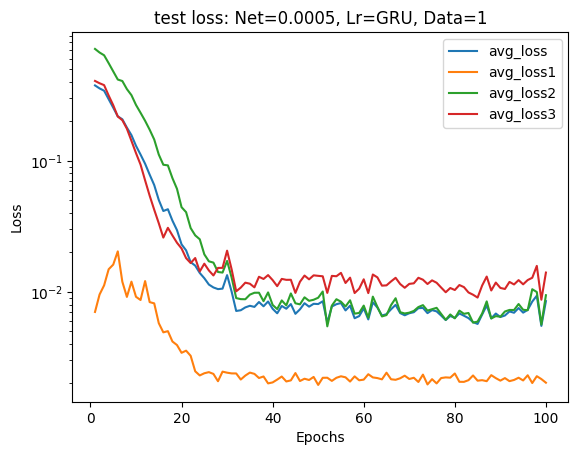

No.16, net = GRU;  lr = 0.0005; data_num = 2


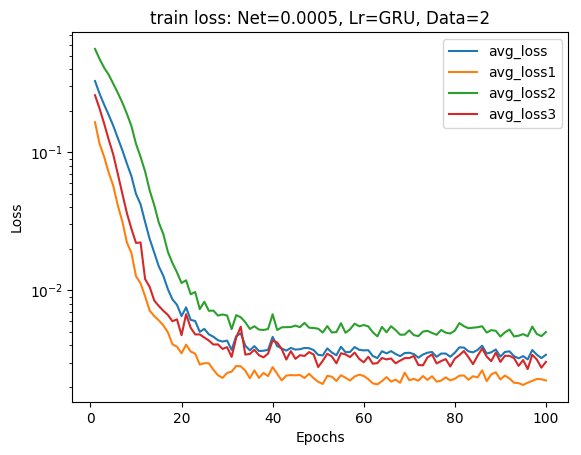

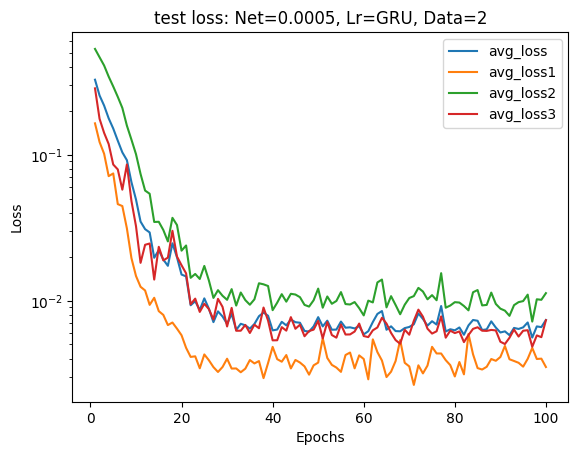

No.17, net = GRU;  lr = 0.0005; data_num = 3


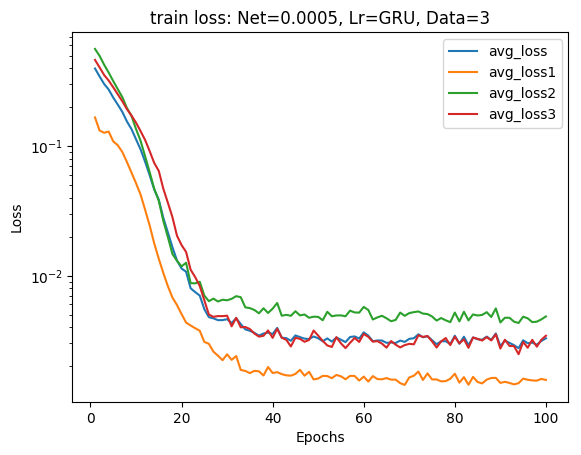

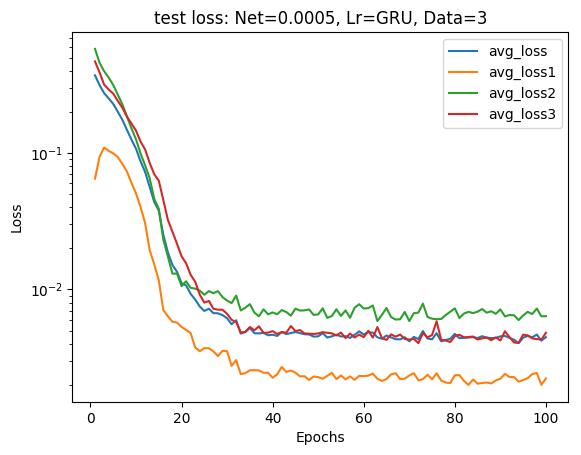

No.18, net = GRU;  lr = 0.0005; data_num = 4


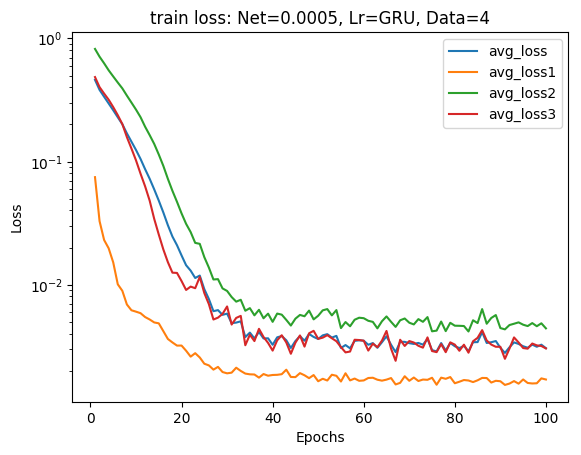

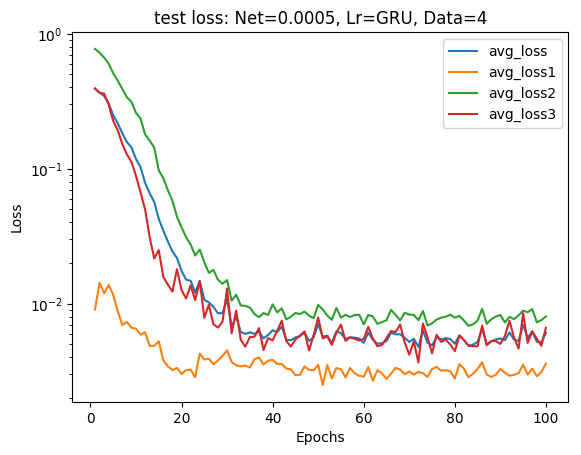

No.19, net = GRU;  lr = 0.0005; data_num = 5


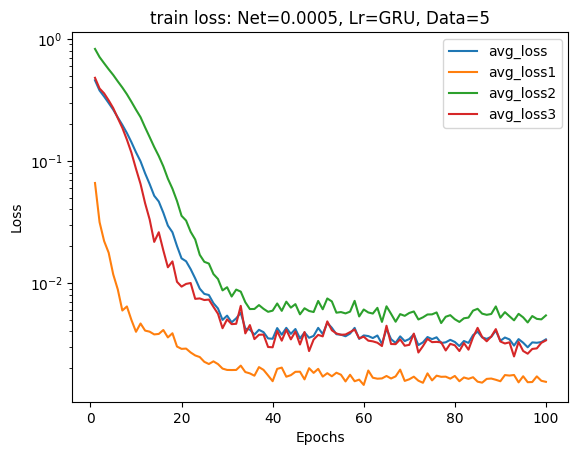

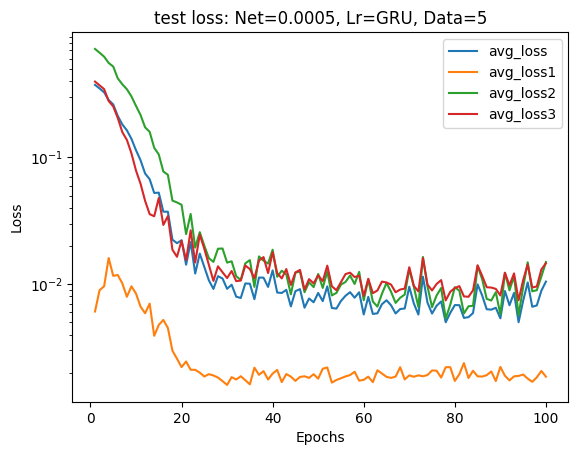

No.20, net = GRU;  lr = 0.0001; data_num = 1


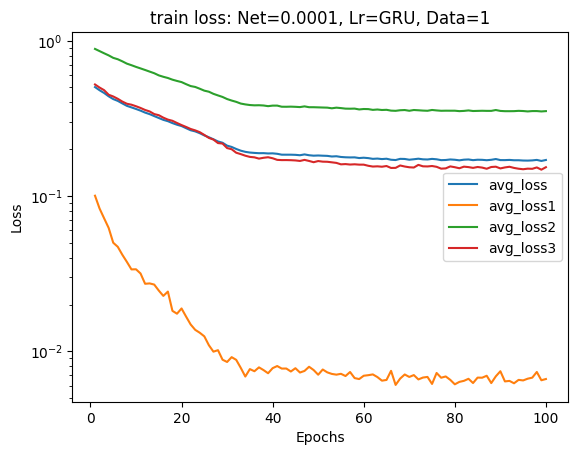

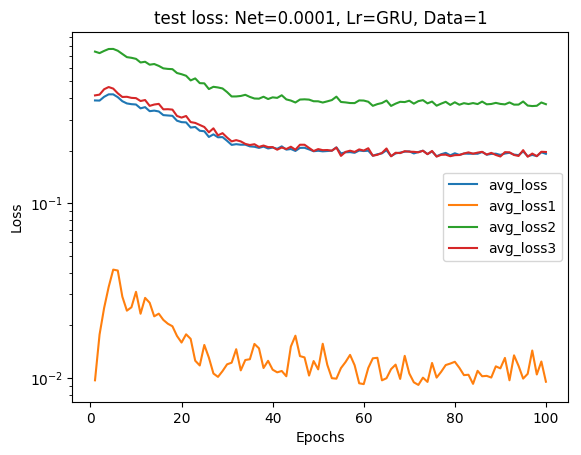

No.21, net = GRU;  lr = 0.0001; data_num = 2


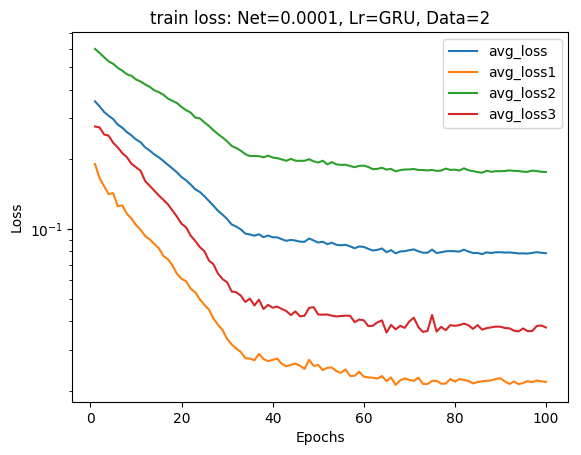

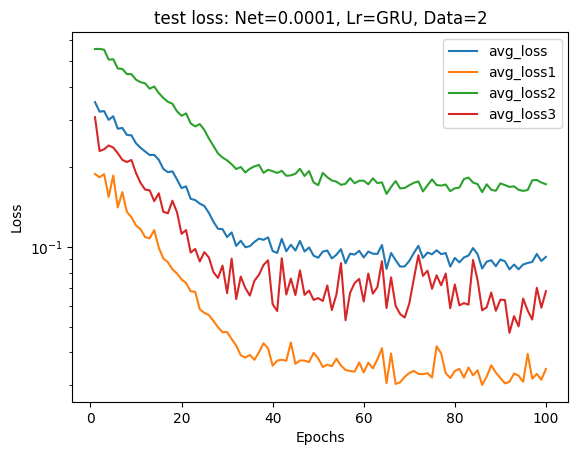

No.22, net = GRU;  lr = 0.0001; data_num = 3


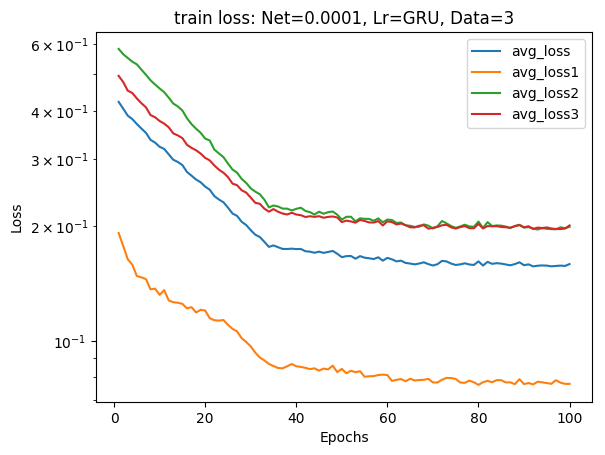

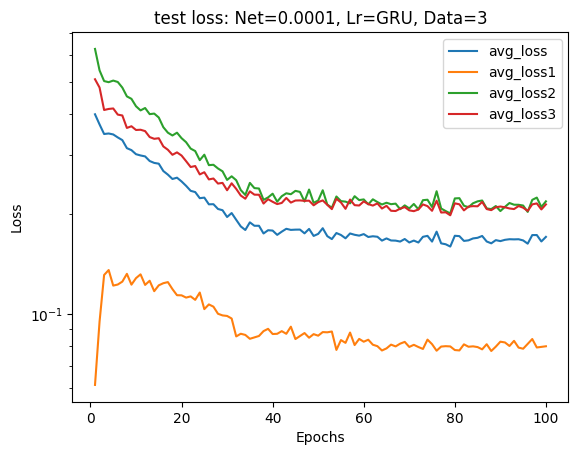

No.23, net = GRU;  lr = 0.0001; data_num = 4


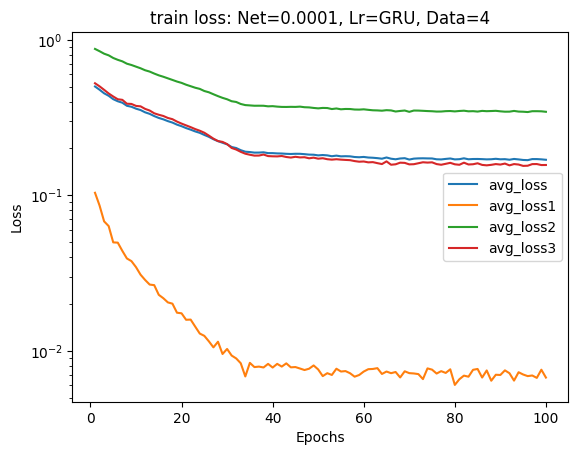

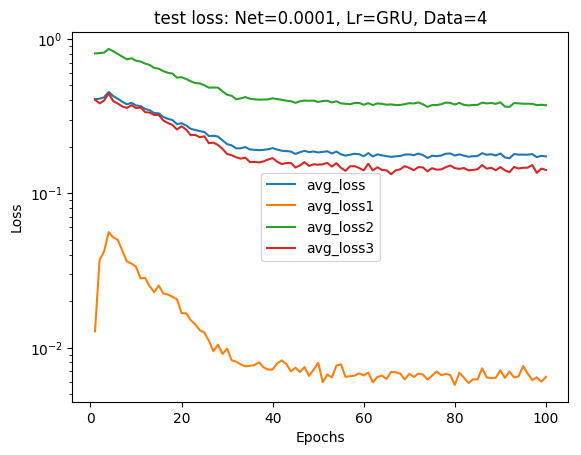

No.24, net = GRU;  lr = 0.0001; data_num = 5


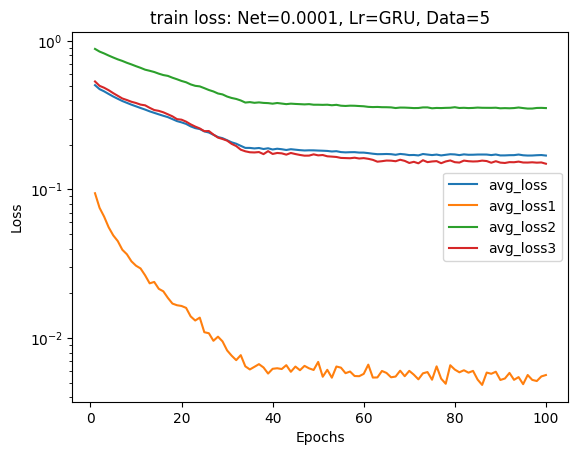

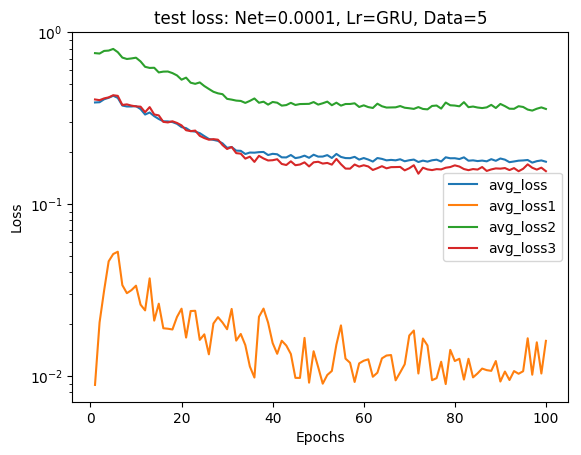

Best results found in this experiment are: 
Total loss: [0.0013334276982479626, (0, ('GRU', 0.01, 1))]
Loss 1:     [0.0008806070131767127, (2, ('GRU', 0.01, 3))]
Loss 2:     [0.0016677036182954907, (0, ('GRU', 0.01, 1))]
Loss 3:     [0.00067080638837069273, (3, ('GRU', 0.01, 4))]


In [85]:
# This is the main function! 

# Specifty the filename and location of training log
df = pd.read_csv('training_results_gru.csv')

# Drop unused columns
df = df.drop(['Unnamed: 0'], axis = 1)

# Group the table by specifying the hyperparameters
grouped_df = df.groupby(['net', 'lr', 'data_num'])
keys = list(grouped_df.groups.keys())

# Print the information of how many jobs are submitted, check if it agrees
print("There are {} jobs submitted, they are: ".format(len(keys)))

# For each setting of hyperparameters, do some analysis
best_avg_loss = [np.infty, 0]
best_avg_loss1 = [np.infty, 0]
best_avg_loss2 = [np.infty, 0]
best_avg_loss3 = [np.infty, 0]

for num, key in enumerate(get_keys_from_exp()):
    # Print the infomration for current hyperparameter
    print('No.{}, net = {};  lr = {}; data_num = {}'.format(num, key[0], key[1], key[2]))
    
    # Print the training and test loss with respect to epoch
    loss_cache = generate_loss_plots(grouped_df.get_group(key), key)
    
    # Find the best test loss for each loss function, specify the corresponding hyperparameter
    if best_avg_loss[0] > loss_cache['best_test_avg_loss']:
        best_avg_loss[0] = loss_cache['best_test_avg_loss']
        best_avg_loss[1] = (num, key)
        
    if best_avg_loss1[0] > loss_cache['best_test_avg_loss1']:
        best_avg_loss1[0] = loss_cache['best_test_avg_loss1']
        best_avg_loss1[1] = (num, key)
        
    if best_avg_loss2[0] > loss_cache['best_test_avg_loss2']:
        best_avg_loss2[0] = loss_cache['best_test_avg_loss2']
        best_avg_loss2[1] = (num, key)
        
    if best_avg_loss3[0] > loss_cache['best_test_avg_loss3']:
        best_avg_loss3[0] = loss_cache['best_test_avg_loss3']
        best_avg_loss3[1] = (num, key)
        
print("Best results found in this experiment are: ")
print('Total loss: {}'.format(best_avg_loss))
print('Loss 1:     {}'.format(best_avg_loss1))
print('Loss 2:     {}'.format(best_avg_loss2))
print('Loss 3:     {}'.format(best_avg_loss3))